### Title: project tiltle


### 1. Introduction:
In this project, I demonstrate how to convert a body of text into a visual representation of small units of meaning within the text (semantic network)<br>
<br><strong>Goal: </strong> Use nlp and network method to condense text into a visual representation
<br>
We'll achieve that through a number of techniques including the following:
* 



In [3]:
#imports

# *** NLP tools
import spacy 
import textacy

# *** text resources
from sklearn.feature_extraction import stop_words

# *** Visualization tools
import matplotlib.pyplot as plt
import networkx as net



### 2 Get data
<strong> Data Description:</strong>
* The data used in this project comes from the WHO website and is a news release regarding the state of global access to clean water
* source: https://www.who.int/news-room/detail/19-06-2019-who-flags-critical-funding-gap-calls-for-political-parties-join-fight-against-ebola

In [91]:
# load data
with open('WHO_ebola.txt','r') as inf:
    raw_text = inf.readlines()
    
    
# preview what's in the first few lines of the file

raw_text[:5] 

['## source: https://www.who.int/news-room/detail/19-06-2019-who-flags-critical-funding-gap-calls-for-political-parties-join-fight-against-ebola\n',
 '## title: WHO flags critical funding gap, calls for political parties to join fight against Ebola\n',
 '\n',
 'WHO Director-General briefs Members States on situation in DRC and appeals for funding for the Ebola response\n',
 '\n']

### 2. Preprocessing
* <strong>Goal:</strong> Prepare the data for subsequent analysis. We remove any bits of data that isn't helpful for our goals.

In [90]:
stopWords = stop_words.ENGLISH_STOP_WORDS

In [96]:
# 1. remove the first two lines: source url and title respectively
# 2. then ew remove the '\n' characters
# 3. then we split the text into individual sentences for use in the subsequent steps

raw_text =raw_text[3:]                        
cleaned_sentences = ''.join(raw_text).replace('\n','')

# cleaned_text = [word for word in cleaned_text if word not in stopWords]
words = cleaned_sentences.split(' ')
words = [w for w in words if w.lower() not in stopWords]
words

In [105]:
# use textacy to preprocess doc
raw_text =raw_text[3:]                        
cleaned_sentences = ''.join(raw_text).replace('\n','')

cleaned_sentences = textacy.preprocess_text(cleaned_sentences,
                       lowercase=True,
                       no_numbers=True,
                       no_currency_symbols=True,
                       no_punct=True,)

cleaned_sentences = [w for w in cleaned_sentences.split(' ') if w not in stopWords ]

# 3. Analysis & Visualization
* we convert the text to a semantic network as explained about
* 
### Notes:
We create the network with settings as follows:
* we normalize the text so that different inflections of the same word appear as the root word or <strong>lemma</strong>. It's a common step in NLP to get the best representation of your data
* we include words that co-ocur by specifying a window width for which such words should be counted
* we specify the tie strenght between nodes as the number of times they occur together

In [38]:
 from textacy.viz import draw_semantic_network

In [107]:

sem_net = textacy.network.terms_to_semantic_network(cleaned_sentences, 
                                                    normalize='lemma', 
                                                    window_width=10, 
                                                    edge_weighting='cooc_freq')

D:\Miniconda3\envs\nlp\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


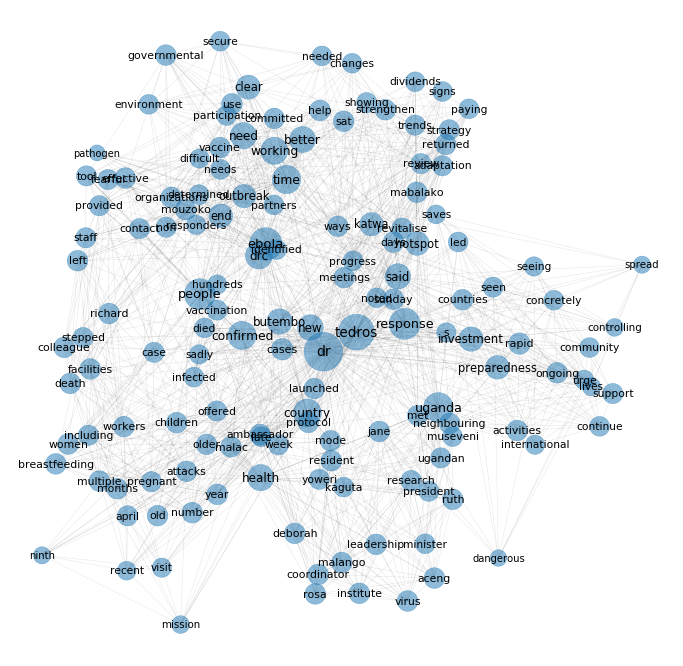

In [208]:
node_weights = dict(sem_net.degree)
plot_obj = draw_semantic_network(sem_net,
                                spread=15.0,
                                draw_nodes=True,
                                node_weights=node_weights,
                                node_alpha=.5,
                                base_node_size = 1500,
                                base_font_size = 14,
                                save='semnet.png')


### Conclusion

In this project we we presented a way to visualize the contents of a text document in a way the reveals meanigful connections between individual terms. Semantic networks are a great way to visualize text to extract useful information quickly. Although, it would a little more refinement to make the graph above more appealing and user friendly, the purpose of our exercise has been achieved and further tweaking can be done as needed.